# Problem Statement
This company provides Health Insurance to its customers. We can build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

Dataset Description: aug_train.csv
This dataset contains information about customers of an insurance company. Each row represents a unique customer, and the columns describe their demographic, vehicle, and policy details. The goal is to predict whether a customer (Response = 1) is interested in purchasing vehicle insurance or not (Response = 0). This is a binary classification problem.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aug_train.csv.zip to aug_train.csv (1).zip


1) Data Loading & Initial Data Exploration

In [ ]:
import pandas as pd
df_train = pd.read_csv('aug_train.csv.zip')

In [ ]:
# head used to display the first rows of the dataset
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [ ]:
df_train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


In [ ]:
# shape the dimensions of the dataset. The output  indicates that it contains 382,154 rows and 12 columns.
df_train.shape

(382154, 12)

In [ ]:
# lists all the columns in the DataFrame
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
#  provides a summary of the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


 insight from df_train.info() is that there are no missing values.

3) Feature Classification and Summary


In [ ]:
# this step shows only numerical columns and converts them into tolist
# toist() Pandas Index into a plain Python list.
# numerical_features will contain all num features
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)


The numerical features in the Insurance Dataset are:
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [ ]:
# this step only tells categorical columns
# categorical_features variable will contain all the categorical columns in dataset
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
print('\nThe Categorical features are:')
print(categorical_features)


The Categorical features are:
['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [ ]:
# this step shows  summary stats info on train dataset
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# provides a summary for the categorical columns,
df_train.describe(include=['O'])


,Gender,Vehicle_Age,Vehicle_Damage
count,382154,382154,382154
unique,2,3,2
top,Male,1-2 Year,No
freq,205603,200176,198501


 4) Data Cleaning and Analysis

In [ ]:
# showing a count of null values for all columns

df_train.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
# no of unique items in each column

for col in df_train.columns:
    print(f'The column {col} has {df_train[col].nunique()} unique values')

The column id has 382154 unique values
The column Gender has 2 unique values
The column Age has 66 unique values
The column Driving_License has 2 unique values
The column Region_Code has 53 unique values
The column Previously_Insured has 2 unique values
The column Vehicle_Age has 3 unique values
The column Vehicle_Damage has 2 unique values
The column Annual_Premium has 48993 unique values
The column Policy_Sales_Channel has 156 unique values
The column Vintage has 290 unique values
The column Response has 2 unique values


In [ ]:
# value count is uded on some columns to see the distribution count of their data:

df_train.Driving_License.value_counts()

,count
Driving_License,
1,381431
0,723


In [ ]:
# distribution count of previously insurd perons
df_train.Previously_Insured.unique()
df_train.Previously_Insured.value_counts()

,count
Previously_Insured,
0,195211
1,186943


In [ ]:
# vehicle damage
df_train.Vehicle_Damage.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# count of Vehicle damage
df_train.Vehicle_Damage.value_counts()

,count
Vehicle_Damage,
No,198501
Yes,183653


In [ ]:
# type of information in Vehicle age column and their dttype
df_train.Vehicle_Age.unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [ ]:
# vehicleage distribution of each type
df_train.Vehicle_Age.value_counts()

,count
Vehicle_Age,
1-2 Year,200176
< 1 Year,166353
> 2 Years,15625


5) Data Visualization

 1)  Histogram:
 Histograms are plotted for Age, Region_Code, Vintage, Policy_Sales_Channel, Annual_Premium, and Previously_Insured. The plot for Annual_Premium shows a strong right skew, suggesting the presence of outliers.

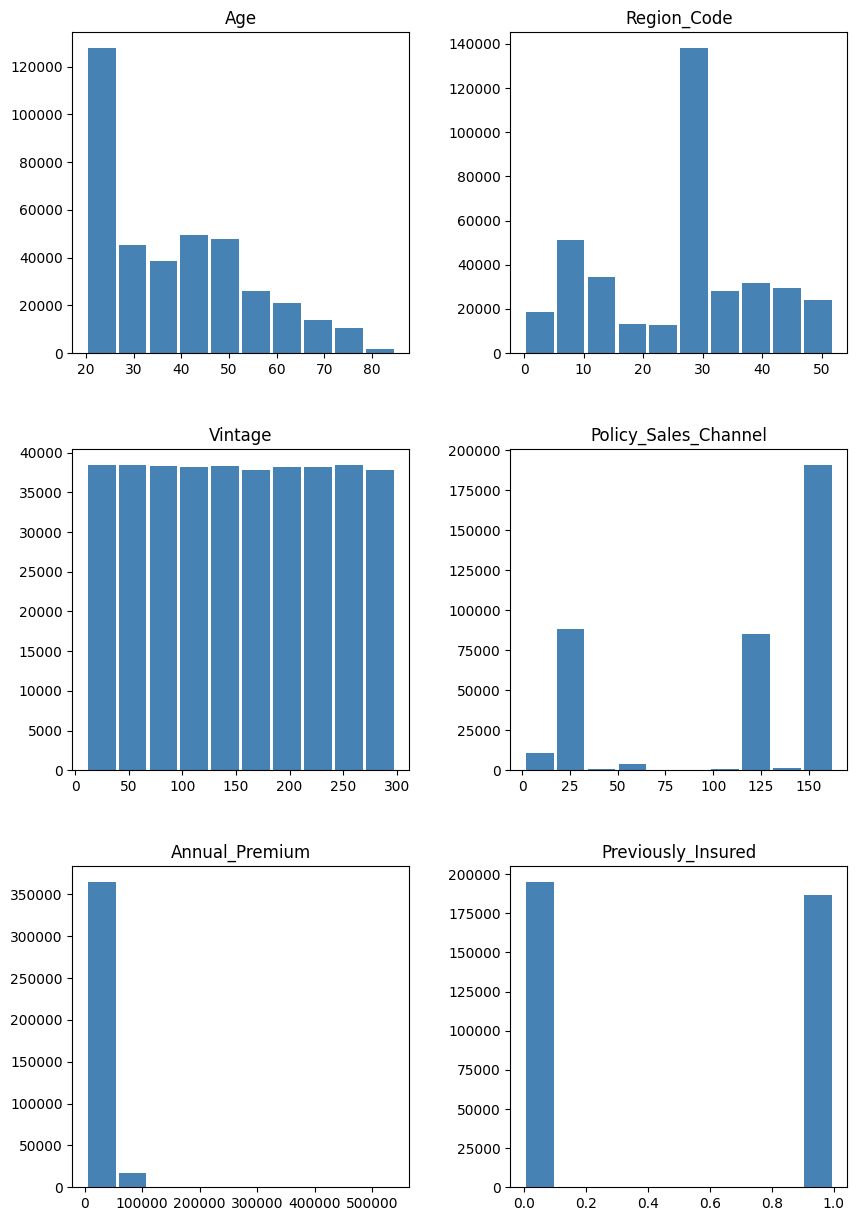

In [ ]:
# histplot used to understand probablity dist of feature
import matplotlib.pyplot as plt

df_train.hist(column=['Age','Region_Code',
                      'Vintage','Policy_Sales_Channel',
                      'Annual_Premium', 'Previously_Insured'],
              color='steelblue',
              figsize=(10,15),
              bins=10,
              rwidth=0.9,
              grid=False
             )
plt.show()


By performing 1) min 2) max 3) > 100000 4) <= 100000
we will understand how much annual_premium is distributed

In [ ]:
# the annual premium is skewed right so potential of outliers is there
# Annual Premium : Min = 2630.0 and Max = 540165.0
print('Annual Premium : Min =', df_train['Annual_Premium'].min(),
      'and Max =',df_train['Annual_Premium'].max())

Annual Premium : Min = 2630.0 and Max = 540165.0


In [ ]:
#  total no where annual premium is > 100000
a = df_train.loc[df_train['Annual_Premium'] > 100000, ['Annual_Premium']].count()
print('Total  > 100,000 is',a)

Total  > 100,000 is Annual_Premium    793
dtype: int64


In [ ]:
# total no where anual premium is <= 100000
b = df_train.loc[df_train['Annual_Premium'] <= 100000, ['Annual_Premium']].count()
print('Total <= 100,000 is', b)

Total <= 100,000 is Annual_Premium    381361
dtype: int64


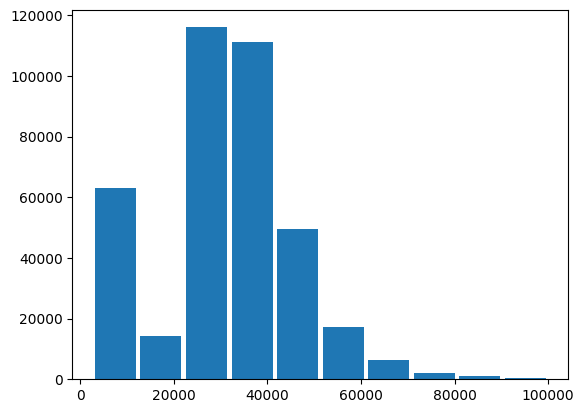

In [ ]:
#  hist plotwhere annual premium is <= 100000
df_train.loc[df_train['Annual_Premium'] <= 100000, 'Annual_Premium'].hist(
               bins = 10,
               rwidth=0.9,
               grid=False
              )
plt.show()

The histograms showed:

Age has a right-skewed distribution, with more young customers.

Annual_Premium is heavily right-skewed, indicating that most customers pay a lower premium, but a few pay a very high amount (potential outliers).

Vintage and Policy_Sales_Channel have relatively uniform or multimodal distributions.

2) Bar and Pie Charts:

A horizontal bar chart shows that there are more male than female customers.

A bar chart for Vehicle_Age visualizes the counts for each category.

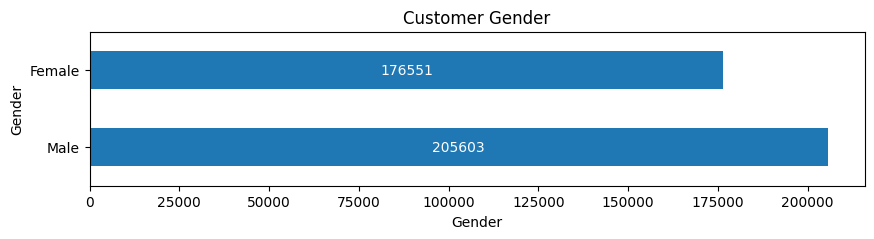

In [ ]:
# gender in the dataset bar graph plot
# this bar graph simply tells gender wise ditribution among customers and their total
c = df_train.Gender.value_counts().plot(kind='barh', figsize=(10,2), grid=False)
c.bar_label(c.containers[0], label_type='center', color='white')
plt.title('Customer Gender')
plt.xlabel('Gender')
plt.show()

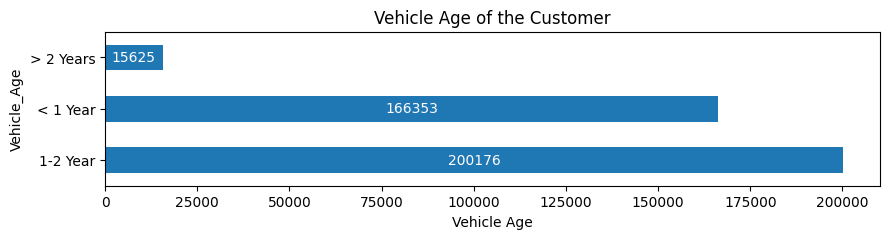

In [ ]:
# vahicles and their age bar graph plot
# this bar graph counts the no of vehicles belonging to particular age criteria
d = df_train.Vehicle_Age.value_counts().plot(kind='barh', figsize=(10,2), grid=False)
d.bar_label(d.containers[0], label_type='center', color='white')
plt.title('Vehicle Age of the Customer')
plt.xlabel('Vehicle Age')
plt.show()

The bar plots showed:
The Gender plot showed more male customers than female customers.

The Vehicle_Age plot visually confirmed that '1-2 Year' is the most frequent category.

3) A pie chart for the Response column indicates that only 16.38% of customers are interested in purchasing the insurance, while 83.62% are not. This highlights a significant class imbalance.

<function matplotlib.pyplot.show(close=None, block=None)>

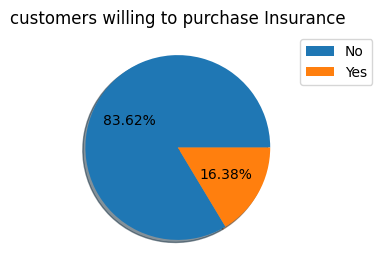

In [ ]:
# categorizing customers willing to purchase the insurance with the help of pie chart
e = df_train.Response.value_counts().plot(kind='pie', figsize=(10,3),
                                        grid=False, ylabel='',
                                        labels = ['No', 'Yes'],
                                        shadow=True,
                                        legend=True, labeldistance=None,
                                        autopct='%1.2f%%')
e.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('customers willing to purchase Insurance')
plt.show

The pie chart shows:
 The Response pie chart is very insightful, showing a significant class imbalance. About 83.6% of customers were not interested in the insurance (Response = 0), and only about 16.4% were (Response = 1). This is a critical finding for later machine learning modeling.

 4) Kernel Density Estimate (KDE) Plots

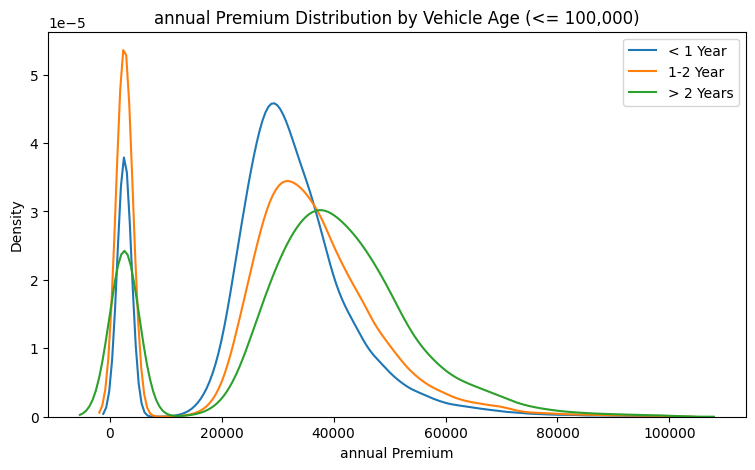

In [ ]:
# kde plotshows probablity distribution. annual premium with their age
import seaborn as sns
f, ax = plt.subplots(1, 1, figsize = (9,5))

df_filtered = df_train.loc[df_train['Annual_Premium'] <= 100000]

sns.kdeplot(df_filtered[df_filtered.Vehicle_Age == '< 1 Year']["Annual_Premium"], ax = ax)
sns.kdeplot(df_filtered[df_filtered.Vehicle_Age == '1-2 Year']["Annual_Premium"], ax = ax)
sns.kdeplot(df_filtered[df_filtered.Vehicle_Age == '> 2 Years']["Annual_Premium"], ax = ax)
plt.legend(['< 1 Year', '1-2 Year', '> 2 Years'])
plt.title('annual Premium Distribution by Vehicle Age (<= 100,000)')
plt.xlabel('annual Premium')
plt.show()

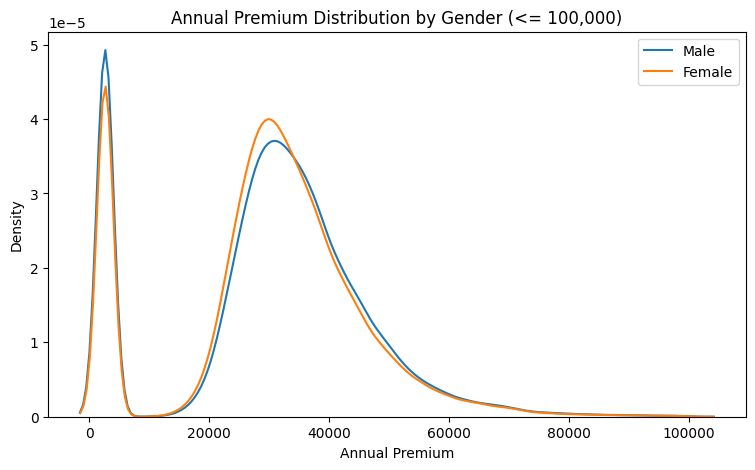

In [ ]:
# prob distribution of gender wise premium
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(df_filtered[df_filtered.Gender == 'Male']["Annual_Premium"], ax = ax)
sns.kdeplot(df_filtered[df_filtered.Gender == 'Female']["Annual_Premium"], ax = ax)
plt.legend(['Male', 'Female'])
plt.title('Annual Premium Distribution by Gender (<= 100,000)')
plt.xlabel('Annual Premium')
plt.show()

Result kde plot:
By comparing Annual_Premium across Vehicle_Age, you found that the premium distributions are very similar regardless of the vehicle's age.

Similarly, the distributions for Annual_Premium were nearly identical for 'Male' and 'Female' customers.

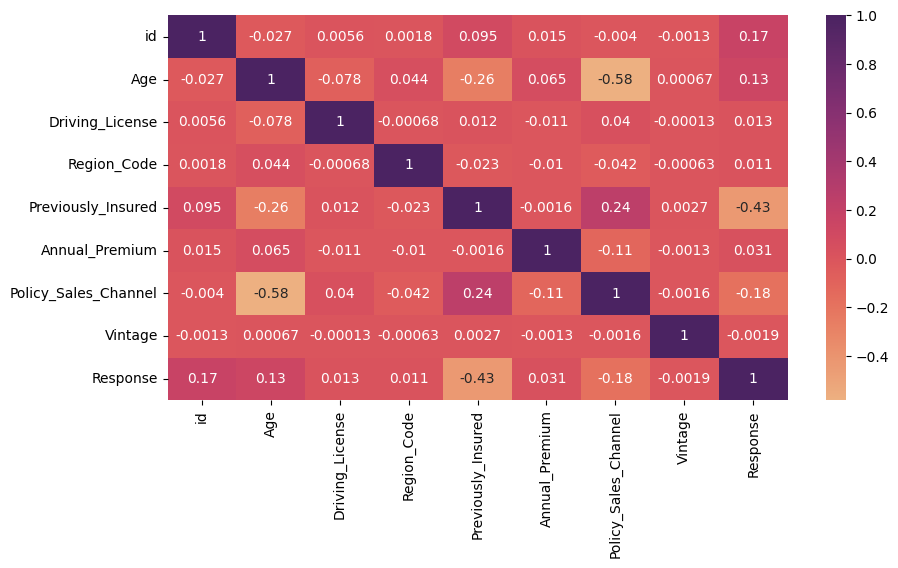

In [ ]:
plt.figure(figsize=(10,5))
corr = df_train[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='flare');

Heat map showed:
Previously_Insured has the strongest correlation with the Response variable

 5) Encoding Categorical Columns


 transformation on categorical features using label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])
df_train['Vehicle_Age'] = label_encoder.fit_transform(df_train['Vehicle_Age'])
df_train['Vehicle_Damage'] = label_encoder.fit_transform(df_train['Vehicle_Damage'])
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  int64  
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  int64  
 7   Vehicle_Damage        382154 non-null  int64  
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 35.0 MB


object columns were successfully converted to int64 data types.

6) Box Plots

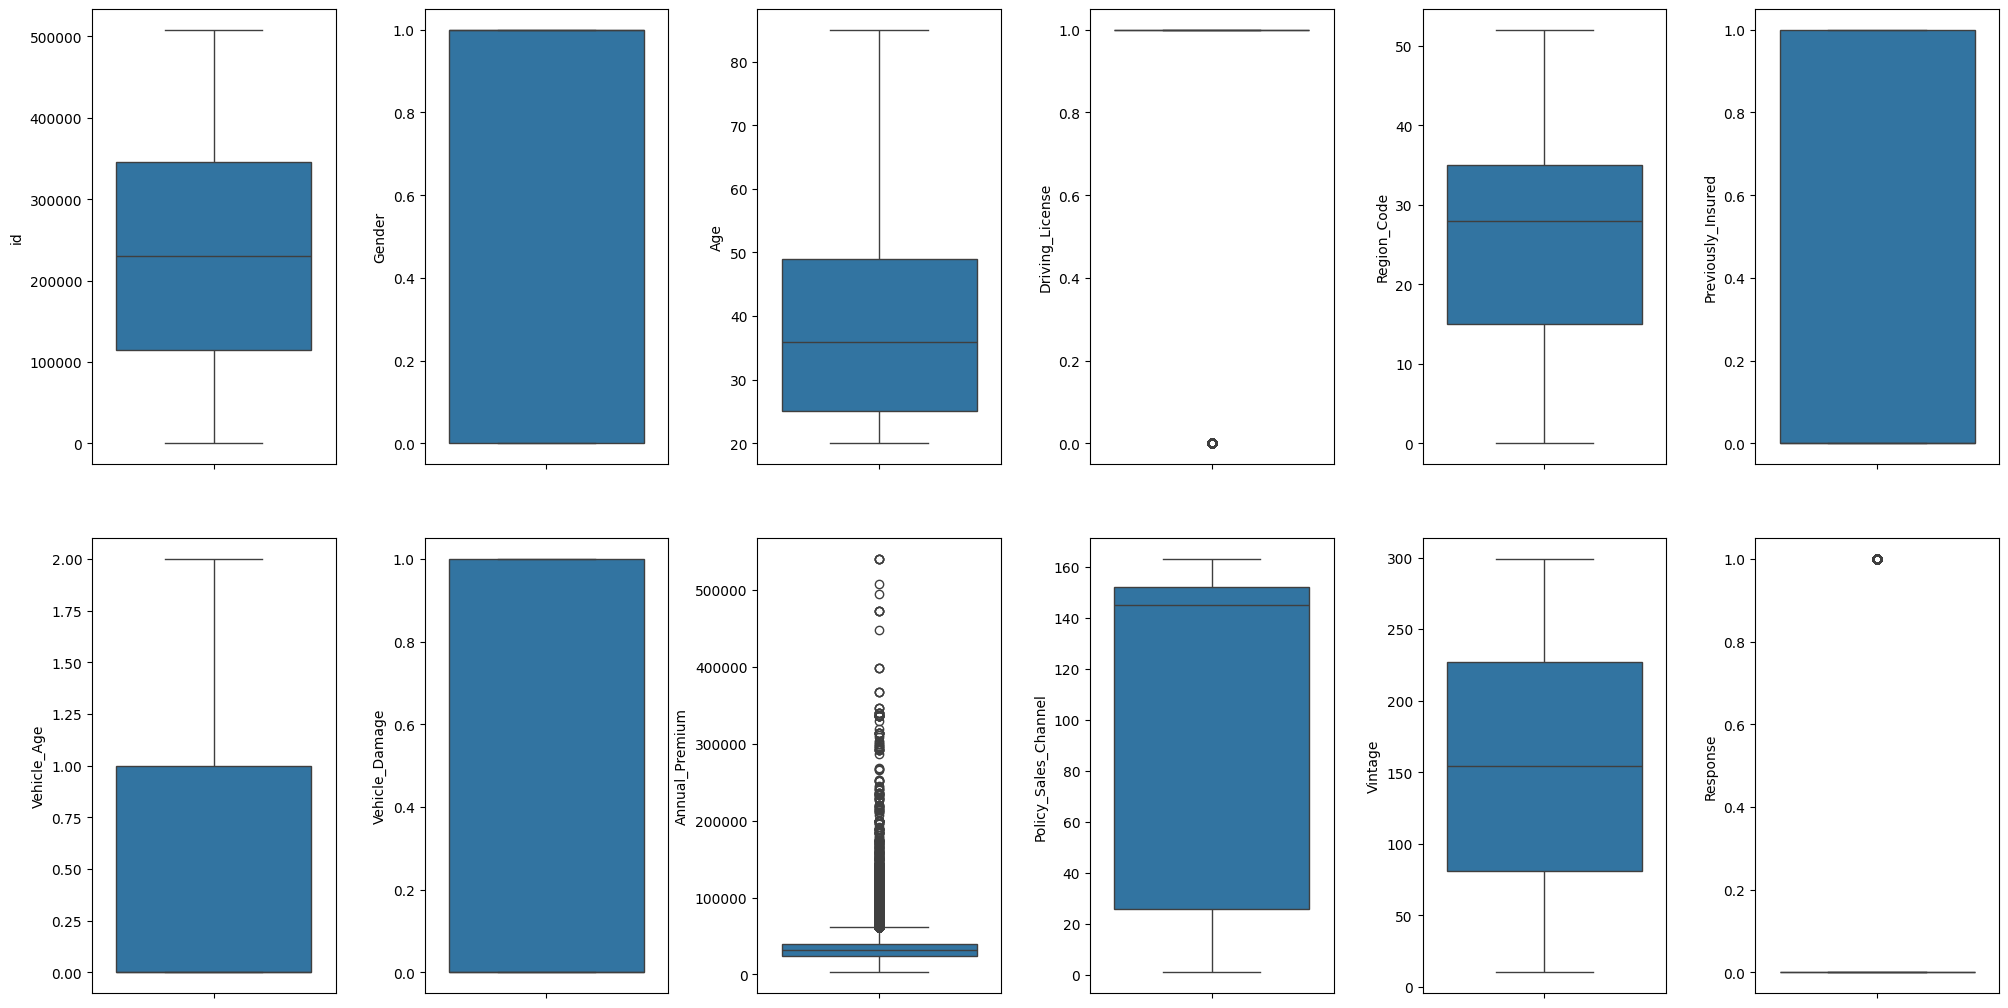

In [ ]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_train.items():
    sns.boxplot(y=k, data=df_train, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

box plots results:
The loop generated box plots for all columns, clearly showing significant outliers in Vintage and Premium_Bin (which represented Annual_Premium).

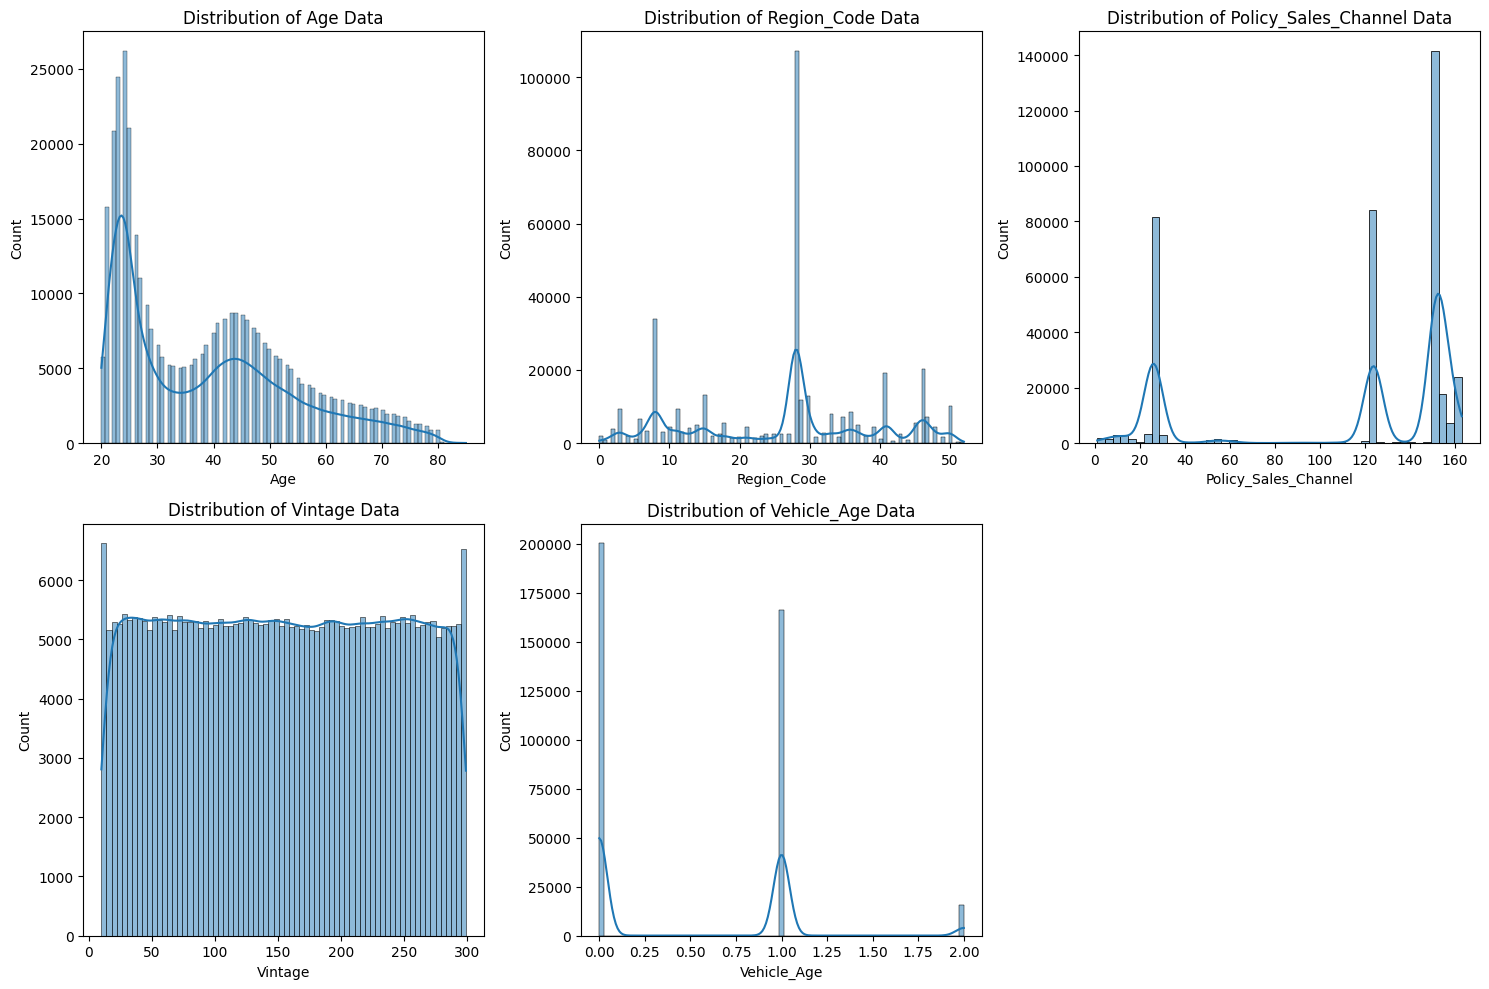

In [ ]:
col_list = ['Age', 'Region_Code', 'Policy_Sales_Channel',
            'Vintage','Vehicle_Age']

plt.figure(figsize=(15,10))
for i,col in enumerate(col_list,1):
    plt.subplot(2,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_train[
      col],kde=True)
    plt.tight_layout()
    plt.plot()

as we can see annual premium is skewed so we can apply binning on it binnig is bucketing the num data in grps to deal with outliers

7) binning

In [ ]:
def bin_annual_premium(row_val):
  if row_val >= 100000:
    return 999
  else:
    x = int( (row_val // 1000) + 1 )
    return x
df_train['Premium_Bin'] = df_train['Annual_Premium'].apply(bin_annual_premium)
df_train[['Annual_Premium','Premium_Bin']]

,Annual_Premium,Premium_Bin
0,2630.0,3
1,43327.0,44
2,35841.0,36
3,27645.0,28
4,29023.0,30
...,...,...
382149,23938.0,24
382150,336395.0,999
382151,40443.0,41
382152,25380.0,26


In [ ]:
df_train.Premium_Bin.unique()

array([  3,  44,  36,  28,  30,  56,  64,  48,  26,  41,  39,  34,  31,
        29,  27,  24,  46,  25,  33,  54,  42,  45,  67,  32,  66,  76,
        37,  53,  43,  38,  23,  22,  20,  21,  35,  17,  40,  80,  61,
        79,  75,  51,  70,  84,  59,  58,  49,  47,  50,  55,  60,  52,
        73,  77,  63,  19,  57,  18,  69,  91,  78,  92,  15,  65, 100,
        62,  74,  68,  72, 999,  16,  87,  81,  88,  71,  85,  82,  14,
        86,  95,  90,  83,  98,  12,  13,   7,  89,  96,  99,  93,  97,
        94,  11,  10,   8])

In [ ]:
df_train.drop('Annual_Premium', axis='columns', inplace=True)

In [ ]:
numerical_features.remove('Annual_Premium')
numerical_features.append('Premium_Bin')

Binning:
created a new Premium_Bin column and dropped the original Annual_Premium column to use this new, binned feature for analysis.

Removing Outliers


In [ ]:
df_no_outlier = df_train.loc[df_train['Premium_Bin'] != 999]
df_no_outlier.shape

(381361, 12)

In [ ]:
df_train.loc[df_train['Premium_Bin'] == 999].shape


(793, 12)

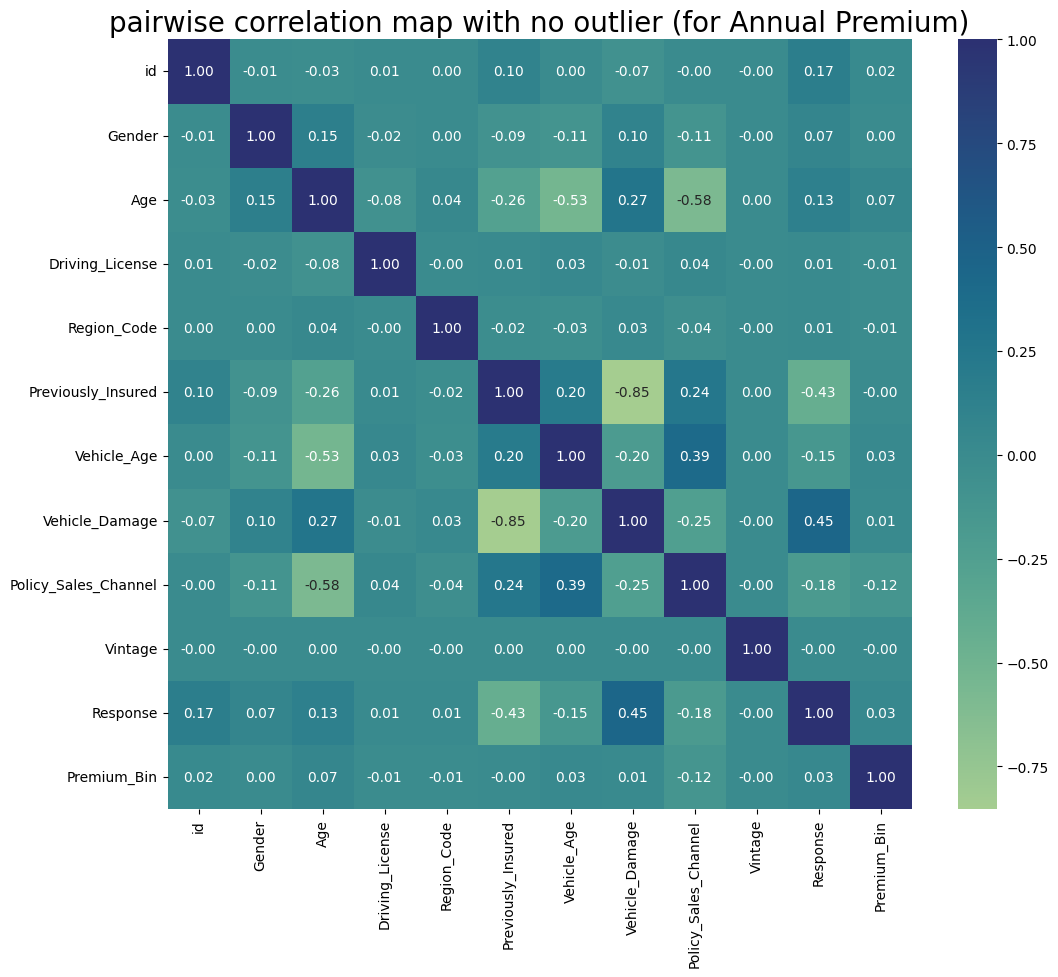

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_no_outlier.corr(),annot=True,fmt='.2f', cmap='crest')
plt.title('pairwise correlation map with no outlier (for Annual Premium)', size = 20)
plt.show()

Final Heatmap showed that most other features have very weak correlations with each other and with the target.